<a href="https://colab.research.google.com/github/AmirHoseein99/Depression-Engine/blob/master/DepressionEffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import pickle
import librosa
import sklearn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import librosa.display
import tensorflow as tf
from keras import layers  
from tensorflow import keras
from collections import Counter
from bottleneck import partition
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy import stats

# read the interviews and extracting insights from it

In [ ]:
def readTranscripts(path):
  all_transcripts = {}
  all_files = glob.glob(path + "/*")
  for filename in all_files:
      id = int(filename.split("/")[6].split("_")[0])
      trainscript = pd.read_csv(filename, sep='\t')
      all_transcripts[id] = trainscript
  return all_transcripts

extracting time it take for the subject to response to a sentence

In [ ]:
def extract_response_times (transcript) :
  response_times = []
  for i in range(len(transcript)):
    if i > 0:
      j = i - 1
      if transcript.iloc[i].speaker == "Participant":
        if transcript.iloc[j].speaker != "Participant":
          response_time = transcript.iloc[i].start_time - transcript.iloc[j].stop_time
          response_time = float("{:.2f}".format(response_time))
          response_times.append(response_time)
  return np.array(response_times)

extracting the time interval between subjects sentences

In [ ]:
def extract_pause_times (transcript):
  puase_times=[]
  pauses_nums = 0
  for i in range(len(transcript)):
    if i > 0:
      j = i - 1
      if transcript.iloc[i].speaker == "Participant":
        if transcript.iloc[j].speaker == "Participant":
          pause_time = transcript.iloc[i].start_time - transcript.iloc[j].stop_time
          pause_time = float("{:.2f}".format(pause_time))
          pauses_nums = pauses_nums + 1
          puase_times.append(pause_time)
  return np.array(puase_times), pauses_nums

In [ ]:
transcript_featuers

,id,response_time,number_of_pauses,pause_times,PHQ8_Score,PHQ8_bin
0,346,"[0.12, 0.35, 0.63, 1.13, 0.27, 0.57, 0.62, 1.1...",226,"[0.7, 0.75, 2.87, 0.53, 0.63, 0.37, 0.7, 0.54,...",23,1
1,311,"[0.52, 1.33, 2.65, 1.19, 1.61, 1.04, 0.62, 1.1...",61,"[0.61, 0.9, 0.94, 0.47, 0.88, 0.94, 0.84, 1.04...",22,1
2,308,"[1.26, 0.94, 1.06, 0.21, 6.3, 2.89, 2.28, -1.7...",104,"[1.11, 1.04, 1.39, 1.52, 5.83, 1.05, 2.78, 1.9...",21,1
3,364,"[0.06, 0.45, 0.81, 0.7, 1.03, 0.31, 0.39, 0.1,...",312,"[0.49, 0.28, 0.59, 0.79, 0.21, 0.21, 0.57, 0.5...",0,0
4,363,"[0.15, 0.57, 0.81, 1.13, 0.7, 0.7, 0.03, 0.71,...",121,"[0.78, 0.51, 0.56, 0.46, 0.57, 0.67, 0.75, 0.6...",0,0
5,303,"[0.28, 0.35, 0.13, 0.46, 0.63, 0.54, 0.25, 1.0...",46,"[1.72, 0.5, 0.49, 0.98, 1.18, 0.56, 0.53, 0.6,...",0,0


we find the top three and bottom three subjects with the most and least PHQ8_Score  to compare thire insights

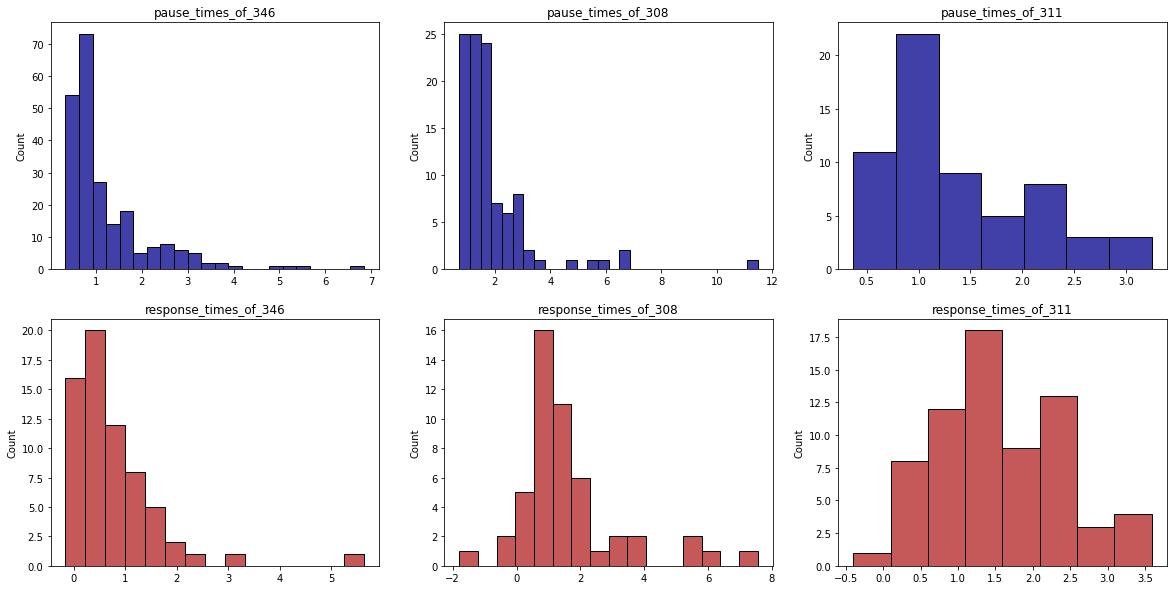

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
i = 0
for k in max_pauses.keys():
  sns.histplot(data=max_pauses[k], ax=axs[0, i], color="darkblue").set_title(f"pause_times_of_{k}")
  sns.histplot(data=max_responses[k], ax=axs[1, i], color="firebrick").set_title(f"response_times_of_{k}")
  i = i+1

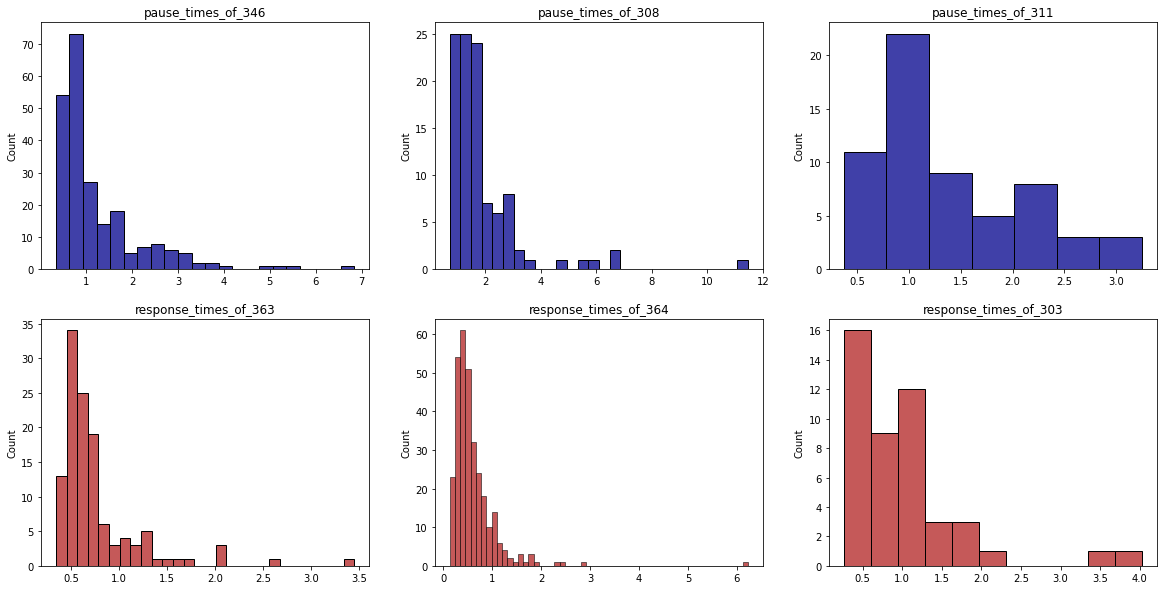

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
i = 0
for k in max_pauses.keys():
  sns.histplot(data=max_pauses[k], ax=axs[0, i], color="darkblue").set_title(f"pause_times_of_{k}")
  i = i+1
i = 0
for k in min_pauses.keys():
  sns.histplot(data=min_pauses[k], ax=axs[1, i], color="firebrick").set_title(f"pause_times_of_{k}")
  i = i+1

we take all data and take a look at PHQ8_Score distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


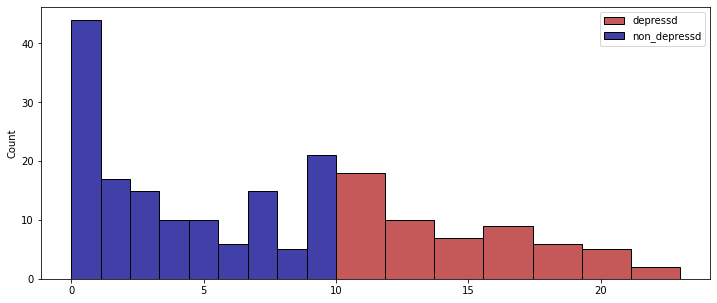

In [ ]:
depressd = scores_1[scores_1 >= 10 ]
non_depressd = scores_1[scores_1 not in depressd]

plt.figure(figsize=(12, 5))

_ =sns.histplot(scores_1[scores_1 > 9 ], label='depressd',color="firebrick")
_ = sns.histplot(scores_1[scores_1 <= 10], label='non_depressd',color="darkblue" )
_ = pyplot.legend(loc='upper right' )
_ = pyplot.show()

we extracted silence from Test Set with or SAD model, now we use thoes labels to perform statistical test

In [ ]:
test_silence_labels.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,Number_of_silences,length_of_silences,avg_length_of_silences
0,300,0,2,1,3717,"[30, 1, 1, 5, 2, 7, 2, 1, 5, 21, 12, 10, 8, 2,...",10.44
1,301,0,3,1,4981,"[14, 7, 4, 2, 4, 6, 2, 2, 5, 2, 15, 3, 2, 3, 1...",7.55
2,306,0,0,0,4899,"[7, 2, 3, 6, 4, 22, 10, 2, 5, 1, 3, 2, 10, 58,...",6.37
3,308,1,22,0,6447,"[10, 9, 3, 1, 1, 9, 1, 30, 1, 48, 25, 41, 1, 2...",13.32
4,309,1,15,1,5324,"[7, 14, 27, 27, 4, 5, 19, 88, 1, 5, 86, 20, 4,...",16.85


single sided test for Number_of_silences

In [ ]:
res = stats.ttest_ind(test_silence_labels[test_silence_labels.PHQ8_Binary == 1].Number_of_silences,
                      test_silence_labels[test_silence_labels.PHQ8_Binary == 0].Number_of_silences, equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') 

p-value for single sided test: 0.0471


single sided test for avg_length_of_silences

In [ ]:
res = stats.ttest_ind(test_silence_labels[test_silence_labels.PHQ8_Binary == 1].avg_length_of_silences,
                      test_silence_labels[test_silence_labels.PHQ8_Binary == 0].avg_length_of_silences, equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') 

p-value for single sided test: 0.0069


now we doing that to entire dataset

In [ ]:
all_ds.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,Number_of_silences,length_of_silences,avg_length_of_silences
0,303,0,0,0,4699,"[15, 1, 6, 1, 1, 1, 6, 3, 2, 5, 4, 17, 1, 4, 4...",6.80
1,304,0,6,0,4680,"[3, 4, 2, 8, 6, 2, 2, 2, 1, 2, 8, 2, 8, 7, 2, ...",8.88
2,305,0,7,1,10501,"[8, 2, 15, 2, 5, 2, 10, 4, 6, 3, 1, 1, 6, 2, 3...",8.41
3,310,0,4,1,6670,"[35, 98, 3, 66, 47, 13, 23, 245, 12, 4, 14, 42...",16.89
4,312,0,2,1,5902,"[3, 12, 9, 1, 2, 8, 3, 4, 1, 6, 6, 2, 7, 5, 9,...",10.73


In [ ]:
res = stats.ttest_ind(all_ds[all_ds.PHQ8_Binary == 1].Number_of_silences,
                      all_ds[all_ds.PHQ8_Binary == 0].Number_of_silences, equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') 

p-value for single sided test: 0.0134


In [ ]:
res = stats.ttest_ind(all_ds[all_ds.PHQ8_Binary == 1].avg_length_of_silences,
                      all_ds[all_ds.PHQ8_Binary == 0].avg_length_of_silences, equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') 

p-value for single sided test: 0.1097


# Permutation test on dataset

In [ ]:
import random
def perm(x, nA, nB):
  n = nA + nB
  idx_B = set(random.sample(range(n), nB))
  idx_A = set(range(n)) - idx_B
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()

Text(0, 0.5, 'Frequency')

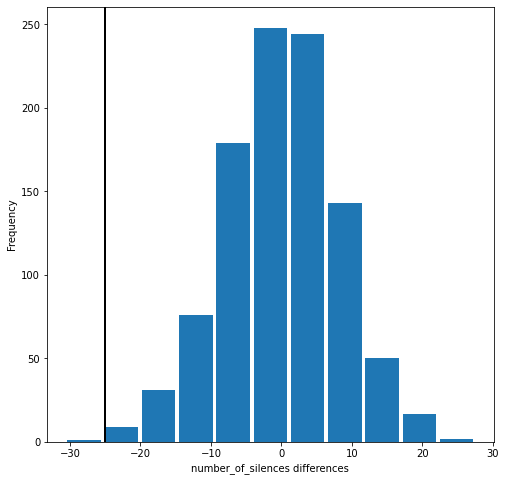

In [ ]:
perm_diffs = [perm(all_ds.number_of_silences, 133, 56) for _ in range(1000)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_num_b - mean_num_a, color='black', lw=2)
# ax.text(-2, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('number_of_silences differences')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

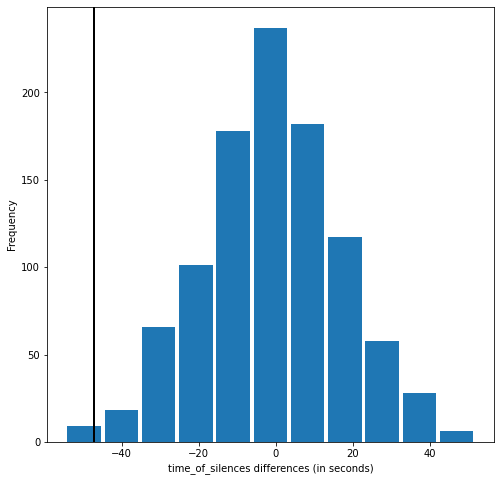

In [ ]:
perm_diffs = [perm(all_ds.time_of_silences, 133, 56) for _ in range(1000)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_time_b - mean_time_a, color='black', lw=2)
# ax.text(-2, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('time_of_silences differences (in seconds)')
ax.set_ylabel('Frequency')

# classifying the subject, based on Number of Silences adn Length of Silences

In [ ]:
train.drop(["PHQ8_Binary", "PHQ8_Score"], axis=1)

,Participant_ID,Gender,number_of_silences,time_of_silences,mean_of_silences
0,303,0,57.0,7307.0,128.192982
1,304,0,84.0,11467.0,136.511905
2,305,1,246.0,37926.0,154.170732
3,310,1,189.0,46674.0,246.952381
4,312,1,150.0,34378.0,229.186667
...,...,...,...,...,...
30,483,1,312.0,50736.0,162.615385
31,484,0,149.0,26609.0,178.583893
32,489,1,176.0,40133.0,228.028409
33,490,1,157.0,37352.0,237.910828


In [ ]:
train = pd.concat([train_labels, valid_labels], axis=0)
X_train = train.drop(["PHQ8_Binary", "PHQ8_Score"], axis=1).to_numpy()
y_train = train[["PHQ8_Binary"]].to_numpy()

In [ ]:
X_test= test_labels.drop(["PHQ8_Binary", "PHQ8_Score"], axis=1).to_numpy()
y_test = test_labels[["PHQ8_Binary"]].to_numpy()

In [ ]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

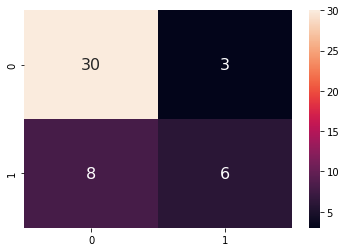

In [ ]:
predict = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
a = confusion_matrix (y_test, predict)
import seaborn as sn
sn.heatmap(a, annot=True, annot_kws={"size": 16})

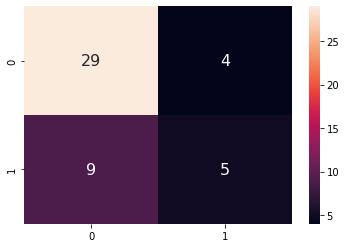

In [ ]:
predict = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
a = confusion_matrix (y_test, predict)
import seaborn as sn
sn.heatmap(a, annot=True, annot_kws={"size": 16})